In [1]:
import os
import numpy as np
import pandas as pd
%matplotlib inline
import IPython.core.display         
# setup output image format (Chrome works best)
IPython.core.display.set_matplotlib_formats("svg")
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
import xgboost as xgb
import pickle

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [66]:
data = pd.read_csv ('ot.csv',sep=',',dtype= np.float64)

In [67]:
data.dropna(inplace=True)

In [68]:
data=np.array(data)
print(data.shape)

(3719, 122)


In [69]:
X = data[:, 1:121]
Y = data[:, 121]

X = np.array(X)
Y = np.array(Y)

In [70]:
xtrain, xtest, trainY, testY = model_selection.train_test_split(X, Y, test_size = 0.3)

In [71]:
#Scaling of data
SS = preprocessing.StandardScaler()
xtrain = SS.fit_transform(xtrain)
xtest = SS.transform (xtest)

In [23]:
RMSE = []
R2 = []
MAE = []
    
parameter = {'n_estimators': [1000], 'max_features': ['auto'], 'criterion': ['mae']}
RF = model_selection.GridSearchCV(ensemble.RandomForestRegressor(),parameter, cv=5, n_jobs=-1)
RF.fit(xtrain, trainY)
    
RFtest_rmse  = np.sqrt(metrics.mean_squared_error(testY, RF.predict(xtest)))
RFtest_r2  = metrics.r2_score(testY, RF.predict(xtest))
RFtest_mae  = metrics.mean_absolute_error(testY, RF.predict(xtest))
    
RMSE.append(RFtest_rmse)  
R2.append(RFtest_r2)
MAE.append(RFtest_mae)
    
print('RMSE: ', min(RMSE), 'R2: ', max(R2), 'MAE: ', min(MAE))
print(RF.best_params_)

RMSE:  8.538251645270229 R2:  0.89854636509714 MAE:  5.519572907706101
{'criterion': 'mae', 'max_features': 'auto', 'n_estimators': 1000}


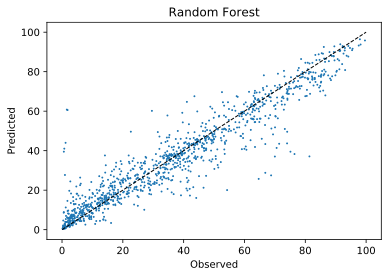

In [24]:
fig, ax = plt.subplots()
ax.scatter(testY, RF.predict(xtest), s = 1)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=1, markersize=0.1)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.set_title('Random Forest')
plt.savefig("2_RandomForest.jpg", format="jpg")
plt.show()

In [17]:
#with open('RF.pickle', "wb") as f:
 #   pickle.dump(RF, f)

In [25]:
RMSE = []
R2 = []
MAE = []
    
parameter = {'n_estimators': [1000], 'loss': ['ls'], 'learning_rate':[0.01], 'criterion': ['friedman_mse'], 
             'min_samples_split': [3], 'max_depth': [10], 'max_features': ['sqrt']}
GB = model_selection.GridSearchCV(ensemble.GradientBoostingRegressor(),parameter, cv=5, n_jobs=-1)
GB.fit(xtrain, trainY)
    
GBtest_rmse  = np.sqrt(metrics.mean_squared_error(testY, GB.predict(xtest)))
GBtest_r2  = metrics.r2_score(testY, GB.predict(xtest))
GBtest_mae  = metrics.mean_absolute_error(testY, GB.predict(xtest))
    
RMSE.append(GBtest_rmse)  
R2.append(GBtest_r2)
MAE.append(GBtest_mae)
    
print('RMSE: ', min(RMSE), 'R2: ', max(R2), 'MAE: ', min(MAE))
print(GB.best_params_)

RMSE:  7.704286708310873 R2:  0.9173972353061386 MAE:  4.935999410916867
{'max_features': 'sqrt', 'learning_rate': 0.01, 'max_depth': 10, 'loss': 'ls', 'criterion': 'friedman_mse', 'min_samples_split': 3, 'n_estimators': 1000}


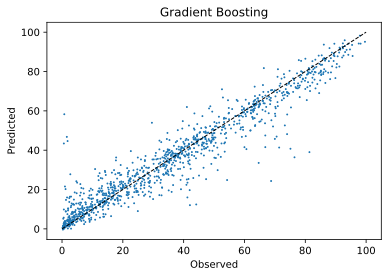

In [26]:
fig, ax = plt.subplots()
ax.scatter(testY, GB.predict(xtest), s = 1)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=1, markersize=0.1)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.set_title('Gradient Boosting')
plt.savefig("3_GradientBoosting.jpg", format="jpg")
plt.show()

In [20]:
#with open('GB.pickle', "wb") as f:
 #   pickle.dump(GB, f)

In [27]:
RMSE = []
R2 = []
MAE = []
    
parameter = {'n_estimators': [1000], 'loss': ['square'], 'learning_rate':[1.0]}
AB = model_selection.GridSearchCV(ensemble.AdaBoostRegressor(),parameter, cv=5, n_jobs=-1)
AB.fit(xtrain, trainY)
    
ABtest_rmse  = np.sqrt(metrics.mean_squared_error(testY, AB.predict(xtest)))
ABtest_r2  = metrics.r2_score(testY, AB.predict(xtest))
ABtest_mae  = metrics.mean_absolute_error(testY, AB.predict(xtest))
    
RMSE.append(ABtest_rmse)  
R2.append(ABtest_r2)
MAE.append(ABtest_mae)
    
print('RMSE: ', min(RMSE), 'R2: ', max(R2), 'MAE: ', min(MAE))
print(AB.best_params_)

RMSE:  15.453217654068924 R2:  0.6676715256669837 MAE:  13.140798466626523
{'n_estimators': 1000, 'learning_rate': 1.0, 'loss': 'square'}


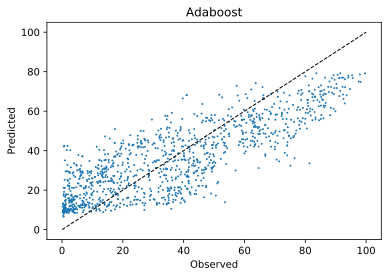

In [28]:
fig, ax = plt.subplots()
ax.scatter(testY, AB.predict(xtest), s =1)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=1, markersize=0.1)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.set_title('Adaboost')
plt.savefig("4_Adaboost.jpg", format="jpg")
plt.show()

In [10]:
#with open('AB.pickle', "wb") as f:
 #   pickle.dump(AB, f)

In [29]:
RMSE = []
R2 = []
MAE = []
    
parameter = {'n_estimators': [1000], 'max_samples': [1500], 'max_features': [50]}
BG = model_selection.GridSearchCV(ensemble.BaggingRegressor(),parameter, cv=5, n_jobs=-1)
BG.fit(xtrain, trainY)
    
BGtest_rmse  = np.sqrt(metrics.mean_squared_error(testY, BG.predict(xtest)))
BGtest_r2  = metrics.r2_score(testY, BG.predict(xtest))
BGtest_mae  = metrics.mean_absolute_error(testY, BG.predict(xtest))
    
RMSE.append(BGtest_rmse)  
R2.append(BGtest_r2)
MAE.append(BGtest_mae)
    
print('RMSE: ', min(RMSE), 'R2: ', max(R2), 'MAE: ', min(MAE))
print(BG.best_params_)

RMSE:  9.33937987039509 R2:  0.8786147851841591 MAE:  6.109254416752011
{'max_features': 50, 'max_samples': 1500, 'n_estimators': 1000}


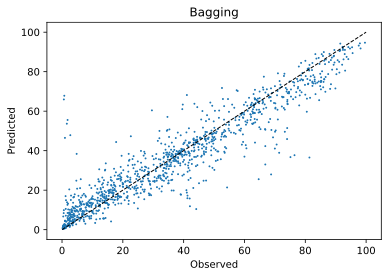

In [30]:
fig, ax = plt.subplots()
ax.scatter(testY, BG.predict(xtest), s = 1)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=1, markersize=0.1)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.set_title('Bagging')
plt.savefig("5_Bagging.jpg", format="jpg")
plt.show()

In [13]:
#with open('BG.pickle', "wb") as f:
 #   pickle.dump(BG, f)

In [72]:
RMSE = []
R2 = []
MAE = []
    
parameter = {'n_neighbors':[5, 10], 'weights': ['uniform', 'distance'], 'algorithm': ['auto'], 'metric': ['minkowski']}
KNN = model_selection.GridSearchCV(neighbors.KNeighborsRegressor(),parameter, cv=5, n_jobs=-1)
KNN.fit(xtrain, trainY)
    
KNNtest_rmse  = np.sqrt(metrics.mean_squared_error(testY, KNN.predict(xtest)))
KNNtest_r2  = metrics.r2_score(testY, KNN.predict(xtest))
KNNtest_mae  = metrics.mean_absolute_error(testY, KNN.predict(xtest))
    
RMSE.append(KNNtest_rmse)  
R2.append(KNNtest_r2)
MAE.append(KNNtest_mae)
    
print('RMSE: ', min(RMSE), 'R2: ', max(R2), 'MAE: ', min(MAE))
print(KNN.best_params_)

RMSE:  16.84586089713409 R2:  0.607150163196236 MAE:  13.060105734767026
{'metric': 'minkowski', 'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'uniform'}


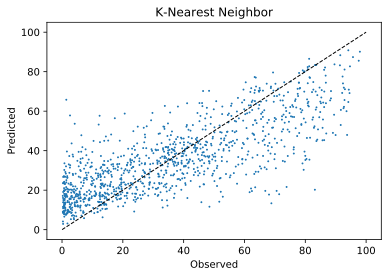

In [73]:
fig, ax = plt.subplots()
ax.scatter(testY, KNN.predict(xtest), s = 1)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=1, markersize=0.1)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.set_title('K-Nearest Neighbor')
plt.savefig("9_KNN.jpg", format="jpg")
plt.show()

In [31]:
RMSE = []
R2 = []
MAE = []
    
parameter = {'kernel': ["rbf", "linear", "poly", "sigmoid"], 'C': [0.1, 1, 10, 100]}
SVM = model_selection.GridSearchCV(svm.SVR(),parameter, cv=5, n_jobs=-1)
SVM.fit(xtrain, trainY)
    
SVMtest_rmse  = np.sqrt(metrics.mean_squared_error(testY, SVM.predict(xtest)))
SVMtest_r2  = metrics.r2_score(testY, SVM.predict(xtest))
SVMtest_mae  = metrics.mean_absolute_error(testY, SVM.predict(xtest))
    
RMSE.append(SVMtest_rmse)  
R2.append(SVMtest_r2)
MAE.append(SVMtest_mae)
    
print('RMSE: ', min(RMSE), 'R2: ', max(R2), 'MAE: ', min(MAE))
print(SVM.best_params_)

RMSE:  11.357546836318978 R2:  0.8204858101063567 MAE:  7.775942694145464
{'C': 100, 'kernel': 'rbf'}


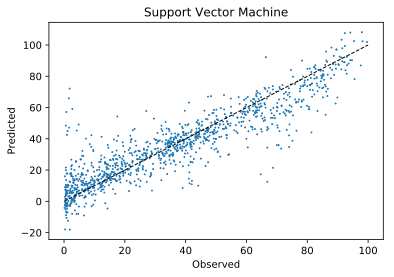

In [32]:
fig, ax = plt.subplots()
ax.scatter(testY, SVM.predict(xtest), s = 1)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=1, markersize=0.1)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.set_title('Support Vector Machine')
plt.savefig("5_Support Vector Machine.jpg", format="jpg")
plt.show()

In [33]:
from sklearn.gaussian_process.kernels import RBF

In [34]:
RMSE = []
R2 = []
MAE = []

kernel = 1.0 * RBF(1.0)
parameter = {'alpha': [0.1, 0.01, 1], 'n_restarts_optimizer': [0], 'kernel': [kernel]}
GPR = model_selection.GridSearchCV(gaussian_process.GaussianProcessRegressor(),parameter, cv=5, n_jobs=-1)
GPR.fit(xtrain, trainY)
    
GPRtest_rmse  = np.sqrt(metrics.mean_squared_error(testY, GPR.predict(xtest)))
GPRtest_r2  = metrics.r2_score(testY, GPR.predict(xtest))
GPRtest_mae  = metrics.mean_absolute_error(testY, GPR.predict(xtest))
    
RMSE.append(GPRtest_rmse)  
R2.append(GPRtest_r2)
MAE.append(GPRtest_mae)
    
print('RMSE: ', min(RMSE), 'R2: ', max(R2), 'MAE: ', min(MAE))
print(GPR.best_params_)

C:\Users\PETINRIN Olutomilayo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RMSE:  10.322359258723626 R2:  0.8517182677151748 MAE:  7.166350475634464
{'n_restarts_optimizer': 0, 'alpha': 0.1, 'kernel': 1**2 * RBF(length_scale=1)}


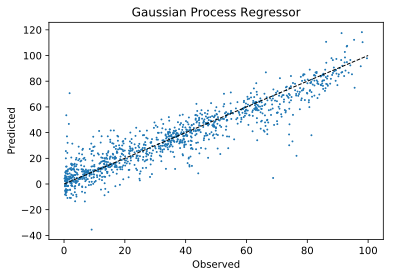

In [35]:
fig, ax = plt.subplots()
ax.scatter(testY, GPR.predict(xtest), s = 1)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=1, markersize=0.1)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.set_title('Gaussian Process Regressor')
plt.savefig("7_GPR.jpg", format="jpg")
plt.show()